In [1]:
import zipfile
zip= zipfile.ZipFile('/content/nails_data.zip','r')
zip.extractall()
zip.close()

In [2]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.applications import InceptionResNetV2

In [3]:
conv_base= InceptionResNetV2(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

219055592/219055592 [==============================] - 1s 0us/step


In [4]:
conv_base.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_norm

In [5]:
conv_base.trainable=True

set_trainable = False

for layer in conv_base.layers:
  if layer.name=='block8_9_mixed':
    set_trainable=True

  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_1 False
conv2d False
batch_normalization False
activation False
conv2d_1 False
batch_normalization_1 False
activation_1 False
conv2d_2 False
batch_normalization_2 False
activation_2 False
max_pooling2d False
conv2d_3 False
batch_normalization_3 False
activation_3 False
conv2d_4 False
batch_normalization_4 False
activation_4 False
max_pooling2d_1 False
conv2d_8 False
batch_normalization_8 False
activation_8 False
conv2d_6 False
conv2d_9 False
batch_normalization_6 False
batch_normalization_9 False
activation_6 False
activation_9 False
average_pooling2d False
conv2d_5 False
conv2d_7 False
conv2d_10 False
conv2d_11 False
batch_normalization_5 False
batch_normalization_7 False
batch_normalization_10 False
batch_normalization_11 False
activation_5 False
activation_7 False
activation_10 False
activation_11 False
mixed_5b False
conv2d_15 False
batch_normalization_15 False
activation_15 False
conv2d_13 False
conv2d_16 False
batch_normalization_13 False
batch_normalization_16 False
activa

In [6]:
conv_base.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_norm

In [7]:
model= Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
batch_size=30
train_datagen= ImageDataGenerator(
    rescale=0.1/255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
    )

test_datagen= ImageDataGenerator(rescale=0.1/255)

train_generator= train_datagen.flow_from_directory('/content/nails_data/train',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='categorical'
)
validation_generator= test_datagen.flow_from_directory('/content/nails_data/test',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 527 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 3, 3, 1536)        54336736  
 ional)                                                          
                                                                 
 batch_normalization_203 (B  (None, 3, 3, 1536)        6144      
 atchNormalization)                                              
                                                                 
 flatten (Flatten)           (None, 13824)             0         
                                                                 
 dense (Dense)               (None, 256)               3539200   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               3

In [13]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history= model.fit_generator(train_generator,
                             epochs=30,
                             validation_data=validation_generator)

<ipython-input-14-49863f7fbf1d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history= model.fit_generator(train_generator,


Epoch 1/30
18/18 [==============================] - 108s 5s/step - loss: 1.4967 - accuracy: 0.4099 - val_loss: 1.3436 - val_accuracy: 0.5333
Epoch 2/30
18/18 [==============================] - 73s 4s/step - loss: 1.2943 - accuracy: 0.4516 - val_loss: 2.4831 - val_accuracy: 0.4111
Epoch 3/30
18/18 [==============================] - 73s 4s/step - loss: 1.1960 - accuracy: 0.5294 - val_loss: 6.1991 - val_accuracy: 0.4000
Epoch 4/30
18/18 [==============================] - 72s 4s/step - loss: 1.1586 - accuracy: 0.5579 - val_loss: 8.7048 - val_accuracy: 0.3667
Epoch 5/30
18/18 [==============================] - 72s 4s/step - loss: 1.1551 - accuracy: 0.5351 - val_loss: 1.6168 - val_accuracy: 0.4778
Epoch 6/30
18/18 [==============================] - 71s 4s/step - loss: 0.9463 - accuracy: 0.5750 - val_loss: 3.0067 - val_accuracy: 0.4333
Epoch 7/30
18/18 [==============================] - 76s 4s/step - loss: 0.8658 - accuracy: 0.6471 - val_loss: 5.5407 - val_accuracy: 0.4444
Epoch 8/30
18/18 [=

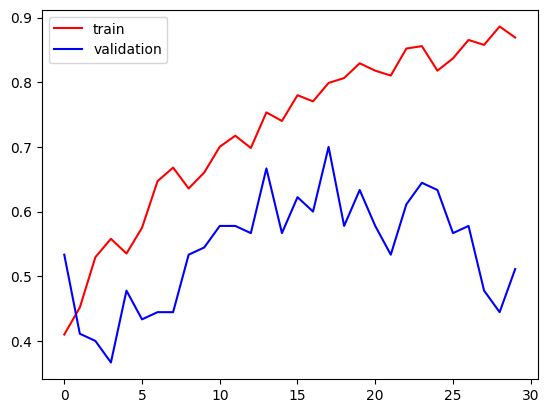

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

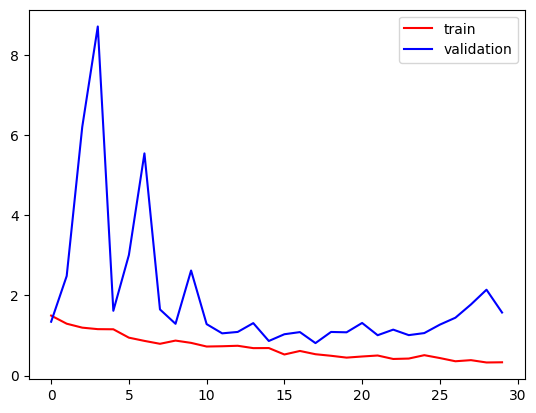

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [17]:
import pickle

In [18]:
with open('model_pickle','wb') as f:
  pickle.dump(model,f)